### Natural Language Syntax
Programming languages and natural languages both have compositional syntax.
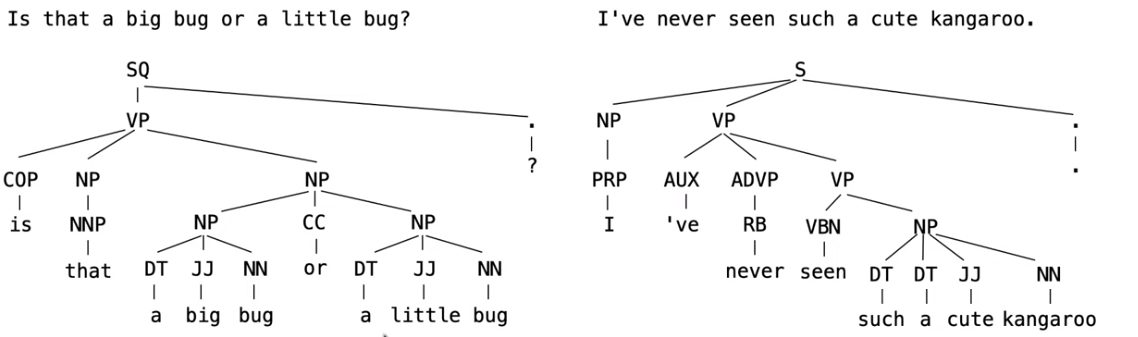

### Representing English Syntax


In [4]:
def tree(root_label, branches=[]):
    for branch in branches:
        assert is_tree(branch), "branches must be trees"
    # check branches are trees
    return [root_label] + list(branches)# in case of passing other sequences


def label(tree):
    return tree[0]

def branches(tree):
    return tree[1:]

def is_tree(tree):
    if type(tree) != list or len(tree) < 1:
        return False
    for branch in branches(tree):
        if not is_tree(branch):
            return False
    #Note: branches 为[]时不会进行循环
    return True

def is_leaf(tree):
    return not branches(tree)
def leaves(tree):
    if is_leaf(tree):
        return [label(tree)]
    #不直接返回tree是因为希望将非列表转化为列表形式
    else:
        l = sum([leaves(l) for l in branches(tree)],[])
        return l

In [5]:
example = tree('ROOT',
               [tree('FRAG',
                     [tree('NP',
                           [tree('DT', [tree('a')]),
                            tree('JJ', [tree('little')]),
                            tree('NN', [tree('bug')])]),
                      tree('.', [tree('.')])])])


In [6]:
leaves(example)

['a', 'little', 'bug', '.']

In [7]:
from string import punctuation
contractions = ["n't", "'s", "'re", "'ve"]
def words(t):
    """Return the words of a tree as a string"""
    s = ''
    for w in leaves(t):
        no_space = (w in punctuation and w != '$') or w in contractions
        if not s or no_space:
            s = s + w
        else:
            s = s + ' ' + w
    return s



In [8]:
words(example)

'a little bug.'

In [10]:
def replace(t, s, w):
    """Return a tree like t with all nodes labeld s replaced by word w"""
    if label(t) == s:
        return tree(s, [tree(w)])
    else:
        return tree(label(t), [replace(b, s, w) for b in branches(t)])

In [12]:
words(replace(example,'JJ', 'cute'))

'a cute bug.'

### Reading data
#### Files, Strings, and Lists
Some files are plain text and can be read into Python as either:   
- One string containing the whole contents of the file: `open('/some/file.txt').read()`
- A list of strings, each containing one line: `open('/some/file.txt').readlines()`

Useful strings methods for processing the contents of a file:   
`.strip()` returns a string without whitespace on the ends.

In [13]:
' hello '.strip()

'hello'

`.split()` returns a list of strings separated by whitespace

In [14]:
'hi there'.split()

['hi', 'there']

`replace(a, b)` returns a string with all instances of string a replaced by string b.

In [15]:
'2+2'.replace('+', ' + ')

'2 + 2'

In [18]:
examples="""
(ROOT (SQ (VP (COP is)
     (NP (NN that))
     (NP (NP (DT a) (JJ big) (NN bug))
      (CC or)
      (NP (DT a) (JJ little) (NN bug))))
     (. ?)))

(ROOT (FRAG (NP (DT a) (JJ little) (NN bug)) (. .)))

""".split('\n')

In [19]:
examples

['',
 '(ROOT (SQ (VP (COP is)',
 '     (NP (NN that))',
 '     (NP (NP (DT a) (JJ big) (NN bug))',
 '      (CC or)',
 '      (NP (DT a) (JJ little) (NN bug))))',
 '     (. ?)))',
 '',
 '(ROOT (FRAG (NP (DT a) (JJ little) (NN bug)) (. .)))',
 '',
 '']

In [24]:
def read_trees(lines):
    """Return trees as lists of tokens from a list of lines
    
    >>> for s in read_trees(examples):
    ...     print(s[:10]))
    ['(', 'ROOT', '(', 'SQ', '(', 'VP', '(', 'COP', 'is', ')']
    ['(', 'ROOT', '(', 'FRAG', '(', 'NP', '(', 'DT', 'a', ')']
    """
    trees = []
    tokens = []
    for line in lines:
        if line.strip():
            tokens.extend(line.replace('(', ' ( ').replace(')', ' ) ').split())
            if tokens.count('(') == tokens.count(')'):
                trees.append(tokens)
                tokens = []
    return trees

def all_trees(path='..\data\CHILDESTreebank-curr\suppes.parsed'):
    return read_trees(open(path).readlines())
    

In [28]:
data = all_trees()
data[1]

['(',
 'ROOT',
 '(',
 'SBARQ',
 '(',
 'WHNP',
 '(',
 'WP',
 'what',
 ')',
 ')',
 '(',
 'SQ',
 '(',
 'AUX',
 'do',
 ')',
 '(',
 'NP',
 '(',
 'PRP',
 'you',
 ')',
 ')',
 '(',
 'VP',
 '(',
 'VB',
 'see',
 ')',
 '(',
 'PP',
 '(',
 'IN',
 'in',
 ')',
 '(',
 'NP',
 '(',
 'DT',
 'the',
 ')',
 '(',
 'NN',
 'book',
 ')',
 ')',
 ')',
 ')',
 ')',
 '(',
 '.',
 '?',
 ')',
 ')',
 ')']

In [29]:
range(0)

range(0, 0)

In [32]:
for i in range(0):
    print(i)
p = [1,2]

SyntaxError: invalid syntax (1001156922.py, line 4)

video content unfinished...